In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("features_df.csv")
df = df.dropna(axis='columns', how='all')
df = df.dropna()
df.head()

,actual,estimate,period,symbol,year,quarter,beat,f1_pup,f2_vup,f3_bothup,f4_average_price
0,1.00,1.1300,2019-12-31,YUM,2019,4,0,0.390625,0.437500,0.187500,103.581563
1,0.80,0.9400,2019-09-30,YUM,2019,3,0,0.468750,0.468750,0.171875,114.279531
2,0.93,0.8700,2019-06-30,YUM,2019,2,1,0.619048,0.460317,0.253968,103.853810
3,0.82,0.8100,2019-03-31,YUM,2019,1,1,0.573770,0.557377,0.327869,94.701148
4,0.40,0.9485,2018-12-31,YUM,2018,4,0,0.523810,0.444444,0.285714,89.395556


In [3]:
len(df)

3600

In [4]:
newdf = df[["symbol", "year", "quarter", "f1_pup", "f2_vup", "f3_bothup", "f4_average_price", "beat", "estimate"]]

In [5]:
df_train = newdf.loc[df["year"] <= 2016]
df_test = newdf.loc[df["year"] >= 2017]

In [6]:
# Set features. This will also be used as your x values.
X_train = df_train[['f1_pup', 'f2_vup', 'f3_bothup', 'f4_average_price', "estimate"]]
X_test = df_test[['f1_pup', 'f2_vup', 'f3_bothup', 'f4_average_price', "estimate"]]
y_train = df_train['beat']
y_test = df_test['beat']

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

Training Data Score: 0.8173333333333334
Testing Data Score: 0.8366666666666667


In [10]:
predictions = knn.predict(X_test_scaled)

In [11]:
dd = pd.DataFrame({"Prediction": predictions, "Actual":y_test})
dd.head()

,Prediction,Actual
0,1,0
1,1,0
2,1,1
3,1,1
4,1,0


In [12]:
# To Confirm the accuracy of testing data
s = dd["Prediction"].count()
wrong = 0
for i in range(0,s):
    a=dd["Prediction"].iloc[i]
    b=dd["Actual"].iloc[i]
    if a != b:
        wrong = wrong + 1
        
(s - wrong) / s

0.8366666666666667

In [13]:
df_check = dd.loc[dd["Prediction"] == 0]
df_check.head()

,Prediction,Actual
75,0,0
297,0,1
504,0,1
513,0,1
659,0,1


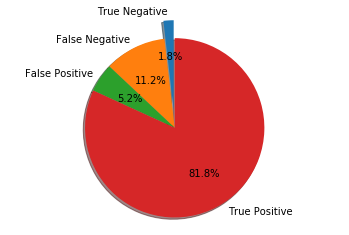

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf = confusion_matrix(dd['Actual'], dd['Prediction'])

tn = conf[0][0]
fp = conf[0][1]
fn = conf[1][0]
tp = conf[1][1]

labels = 'True Negative', 'False Negative', 'False Positive', 'True Positive'
sizes = [tn,fp,fn,tp]
explode = (0.2, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [15]:
target_names = ["Not Beat", "Beat"]
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    Not Beat       0.26      0.14      0.18        78
        Beat       0.88      0.94      0.91       522

    accuracy                           0.84       600
   macro avg       0.57      0.54      0.55       600
weighted avg       0.80      0.84      0.81       600



In [16]:
import pickle
pkl_filename = "knn5.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)

In [17]:
with open(pkl_filename, 'rb') as file:
    knn5 = pickle.load(file)

# Hyperparameter Tuning

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,10,2), 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p' : [1, 2]}

grid = GridSearchCV(knn, param_grid, verbose = 3)

In [19]:
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] algorithm=auto, n_neighbors=1, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=1, p=1, score=0.681, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=1, p=1, score=0.706, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=1, p=1, score=0.684, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=1, p=2, score=0.690, total=   0.0s

C:\Users\ashka\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] algorithm=auto, n_neighbors=1, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=1, p=2, score=0.693, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=1, p=2, score=0.671, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.748, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.751, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.741, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.744, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.757, total=   0.0s
[CV] 

[CV]  algorithm=kd_tree, n_neighbors=1, p=1, score=0.684, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=1, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=1, p=2, score=0.690, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=1, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=1, p=2, score=0.693, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=1, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=1, p=2, score=0.671, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=3, p=1 ...........................
[CV]  algorithm=kd_tree, n_neighbors=3, p=1, score=0.748, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=3, p=1 ...........................
[CV]  algorithm=kd_tree, n_neighbors=3, p=1, score=0.751, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=3, p=1 ...........................
[CV]  algorithm=kd_tree, n_neighbors=3, p=1, score=0.741, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=3, p=2 ...........................

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    5.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([1, 3, 5, 7, 9]), 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [20]:
print(grid.best_params_)
print(grid.best_score_)

{'algorithm': 'auto', 'n_neighbors': 9, 'p': 2}
0.7893333333333333


In [21]:
predictions = grid.predict(X_test_scaled)

In [22]:
target_names = ["Not Beat", "Beat"]
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    Not Beat       0.38      0.04      0.07        78
        Beat       0.87      0.99      0.93       522

    accuracy                           0.87       600
   macro avg       0.62      0.51      0.50       600
weighted avg       0.81      0.87      0.82       600



In [23]:
print(f"Training Data Score: {grid.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {grid.score(X_test_scaled, y_test)}")

Training Data Score: 0.8063333333333333
Testing Data Score: 0.8666666666666667


In [24]:
gg = pd.DataFrame({"Prediction": predictions, "Actual":y_test})
gg.head()

,Prediction,Actual
0,1,0
1,1,0
2,1,1
3,1,1
4,1,0


In [25]:
s = gg["Prediction"].count()
wrong = 0
for i in range(0,s):
    a=gg["Prediction"].iloc[i]
    b=gg["Actual"].iloc[i]
    if a != b:
        wrong = wrong + 1
        
(s - wrong) / s

0.8666666666666667

In [26]:
df_check = gg.loc[gg["Prediction"] == 0]
df_check

,Prediction,Actual
218,0,1
874,0,0
1162,0,1
1443,0,1
1948,0,0
2595,0,1
2814,0,0
3240,0,1


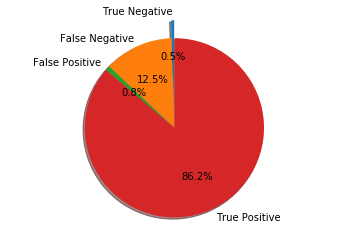

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf = confusion_matrix(gg['Actual'], gg['Prediction'])

tn = conf[0][0]
fp = conf[0][1]
fn = conf[1][0]
tp = conf[1][1]

labels = 'True Negative', 'False Negative', 'False Positive', 'True Positive'
sizes = [tn,fp,fn,tp]
explode = (0.2, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [28]:
pkl_filename = "knn9.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(grid, file)

In [29]:
with open(pkl_filename, 'rb') as file:
    knn9 = pickle.load(file)

In [30]:
predictions = knn9.predict(X_test_scaled)

In [31]:
target_names = ["Not Beat", "Beat"]
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    Not Beat       0.38      0.04      0.07        78
        Beat       0.87      0.99      0.93       522

    accuracy                           0.87       600
   macro avg       0.62      0.51      0.50       600
weighted avg       0.81      0.87      0.82       600

